### 随着训练样本的增多，模型的范化能力的表现力

In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
np.random.seed(666)
x = np.random.uniform(-3, 3, size=100)
y = 0.5*x**2 + x + 0.5 + np.random.normal(size=100)
x = x.reshape(-1, 1)

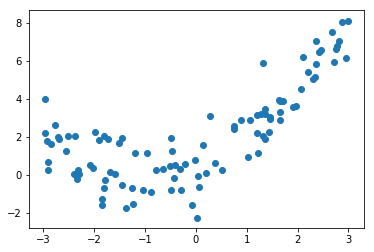

In [15]:
plt.scatter(x, y)

In [25]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)
x_train.shape

(75, 1)

In [29]:
# 要好好理解一下，天才儿童们，是不是呢，真的需要自己动动脑子的，并不是真的就是这样囫囵吞枣
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
train_score = []
test_score = []
for i in range(1, 75):
    lin_reg = LinearRegression()
    lin_reg.fit(x_train[:i], y_train[:i])
    y_train_predict = lin_reg.predict(x_train[:i])
    train_score.append(mean_squared_error(y_train[:i], y_train_predict))
    
    y_test_predict = lin_reg.predict(x_test)
    test_score.append(mean_squared_error(y_test, y_test_predict))

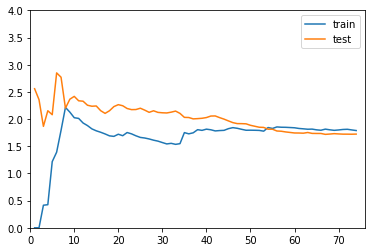

In [32]:
plt.plot([i for i in range(1, 75)], np.sqrt(train_score), label='train')
plt.plot([i for i in range(1, 75)], np.sqrt(test_score), label='test')
plt.axis([0, len(x_train) + 1, 0, 4])
plt.legend()
plt.show()